# Introduction

This lab will show how to compare nearest neighbors classification with and without Neighborhood Components Analysis (NCA). We will plot the class decision boundaries given by a Nearest Neighbors classifier when using the Euclidean distance on the original features, versus using the Euclidean distance after the transformation learned by Neighborhood Components Analysis. The latter aims to find a linear transformation that maximizes the (stochastic) nearest neighbor classification accuracy on the training set. We will use the Iris dataset which contains 3 classes of 50 instances each.

# Import Libraries

We will start by importing the necessary libraries. We will use scikit-learn to perform the nearest neighbors classification and NCA. We will use matplotlib to plot the class decision boundaries.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import Pipeline
from sklearn.inspection import DecisionBoundaryDisplay

# Load and Prepare the Data

Next, we will load and prepare the data. We will load the Iris dataset using scikit-learn and select only two features. We will then split the data into a training set and a testing set.

In [2]:
n_neighbors = 1

dataset = datasets.load_iris()
X, y = dataset.data, dataset.target

# we only take two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = X[:, [0, 2]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42, stratify=y)

# Create Color Maps

We will now create color maps to plot the class decision boundaries. We will use light colors for the background and bold colors for the class colors.

In [3]:
h = 0.05  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])
cmap_bold = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

# Define Classifiers

We will define two classifiers: one using KNN and the other using NCA and KNN. We will use pipelines to scale the data and apply the classifiers.

In [4]:
names = ['KNN', 'NCA', 'KNN']

classifiers = [
    Pipeline(
        [
            ('scaler', StandardScaler()),
            ('knn', KNeighborsClassifier(n_neighbors=n_neighbors)),
        ]
    ),
    Pipeline(
        [
            ('scaler', StandardScaler()),
            ('nca', NeighborhoodComponentsAnalysis()),
            ('knn', KNeighborsClassifier(n_neighbors=n_neighbors)),
        ]
    )
]

# Train and Test Classifiers

We will now train and test the classifiers. We will loop over the classifiers and fit them to the training data. We will then plot the class decision boundaries and calculate the score on the testing data.

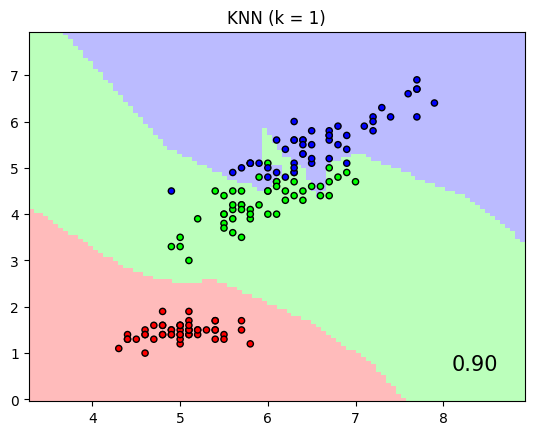

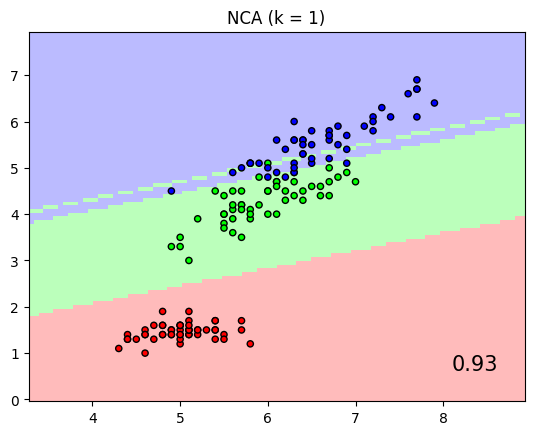

In [5]:
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=cmap_light,
        alpha=0.8,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        shading="auto",
    )

    # Plot also the training and testing points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor="k", s=20)
    plt.title("{} (k = {})".format(name, n_neighbors))
    plt.text(
        0.9,
        0.1,
        "{:.2f}".format(score),
        size=15,
        ha="center",
        va="center",
        transform=plt.gca().transAxes,
    )

plt.show()

# Summary

In this lab, we compared nearest neighbors classification with and without Neighborhood Components Analysis (NCA). We used the Iris dataset to plot the class decision boundaries given by a Nearest Neighbors classifier when using the Euclidean distance on the original features, versus using the Euclidean distance after the transformation learned by NCA. We used scikit-learn to perform the nearest neighbors classification and NCA. We also used matplotlib to plot the class decision boundaries. We found that NCA improved the classification accuracy.